In [4]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
path = "../data/"
df = pd.read_csv(path + 'train.csv')

## 分析

### Pclass

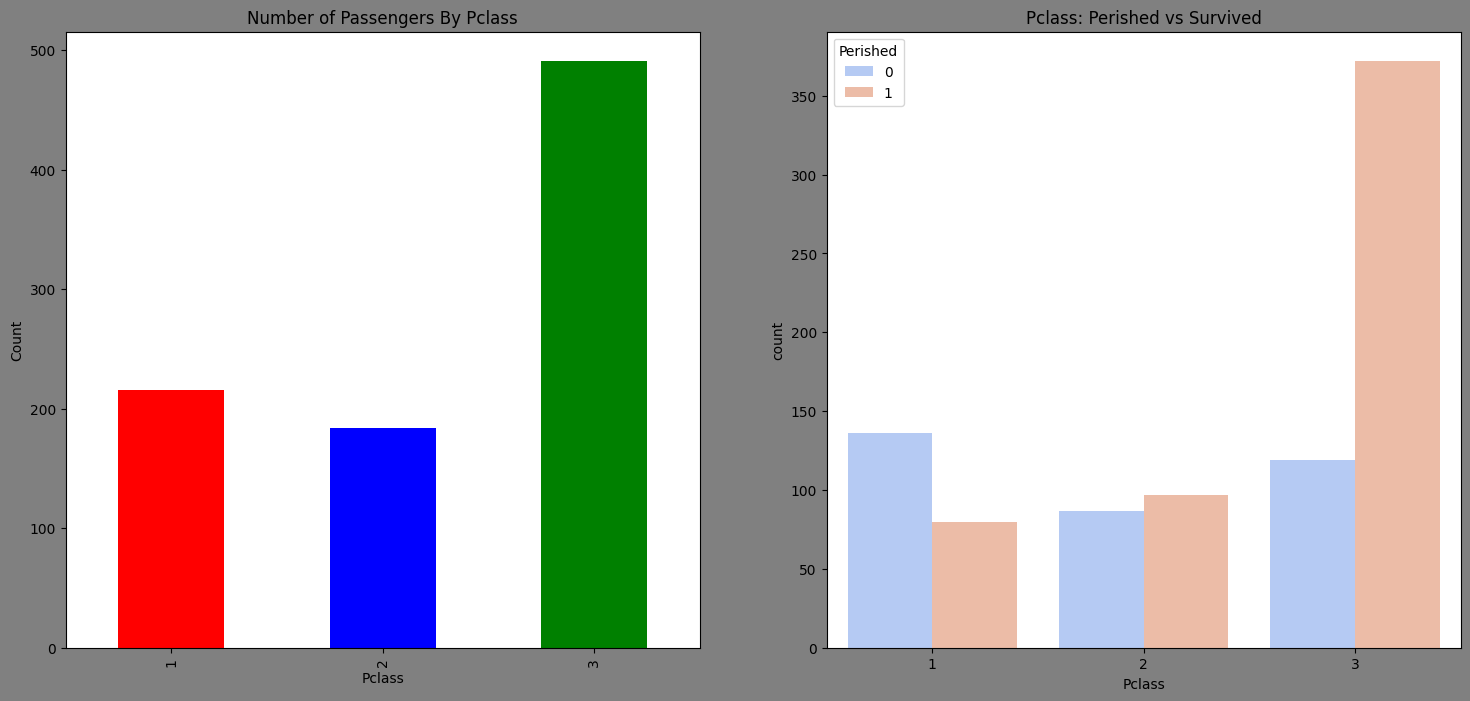

In [33]:
# 横に2つのグラフを表示するための設定
f, ax = plt.subplots(1, 2, figsize=(18, 8), facecolor='gray')

# 1つ目の棒グラフ（Pclass別の乗客数）
df.groupby('Pclass').size().loc[[1, 2, 3]].plot.bar(color=['red', 'blue', 'green'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

# 2つ目のカウントプロット（Pclassと生存・死亡の内訳）
sns.countplot(x='Pclass', hue='Perished', data=df, ax=ax[1], palette='coolwarm', order=[1, 2, 3])
ax[1].set_title('Pclass: Perished vs Survived')

# グラフを表示
plt.show()

### Sex

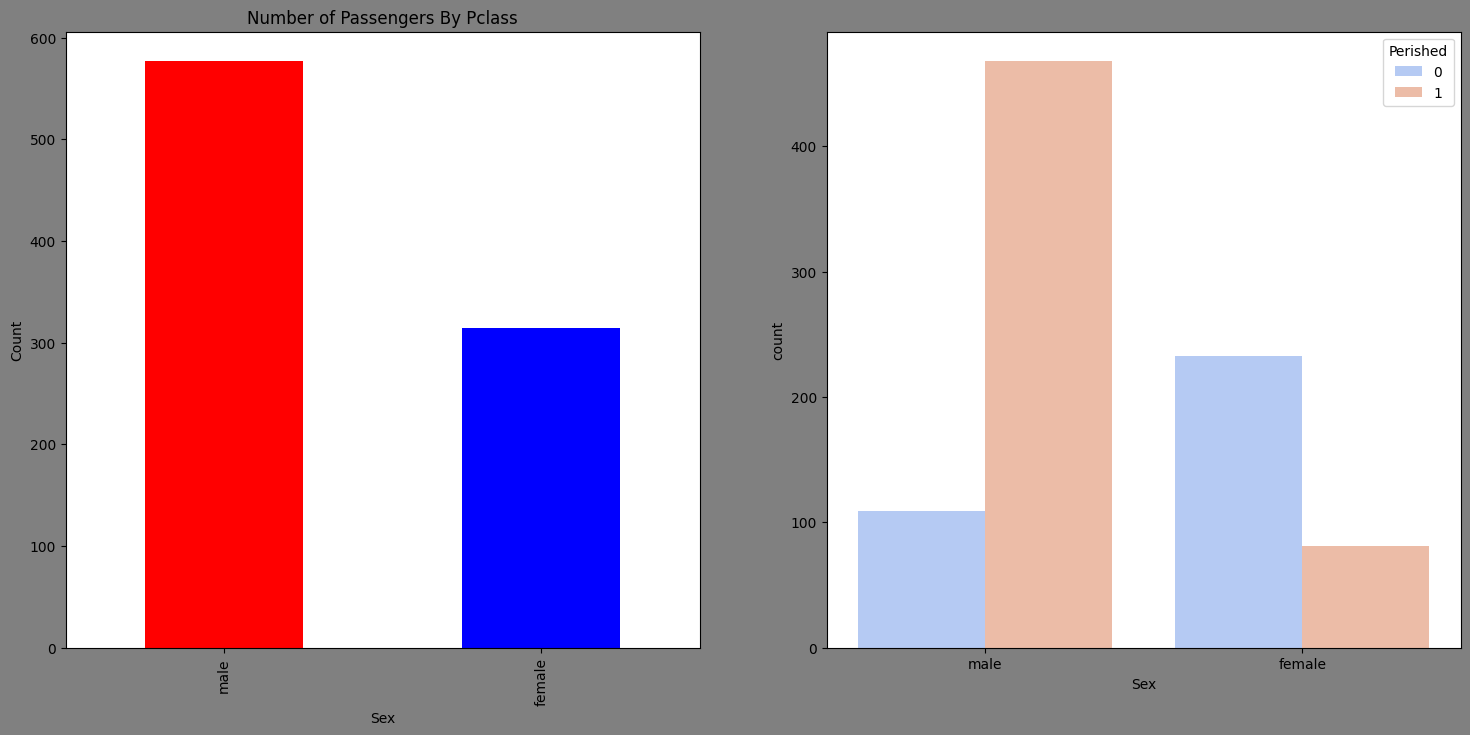

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Sex'].value_counts().plot.bar(color=['red','blue','green'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Sex',hue='Perished',data=df,ax=ax[1],palette='coolwarm')
plt.show()

### Age

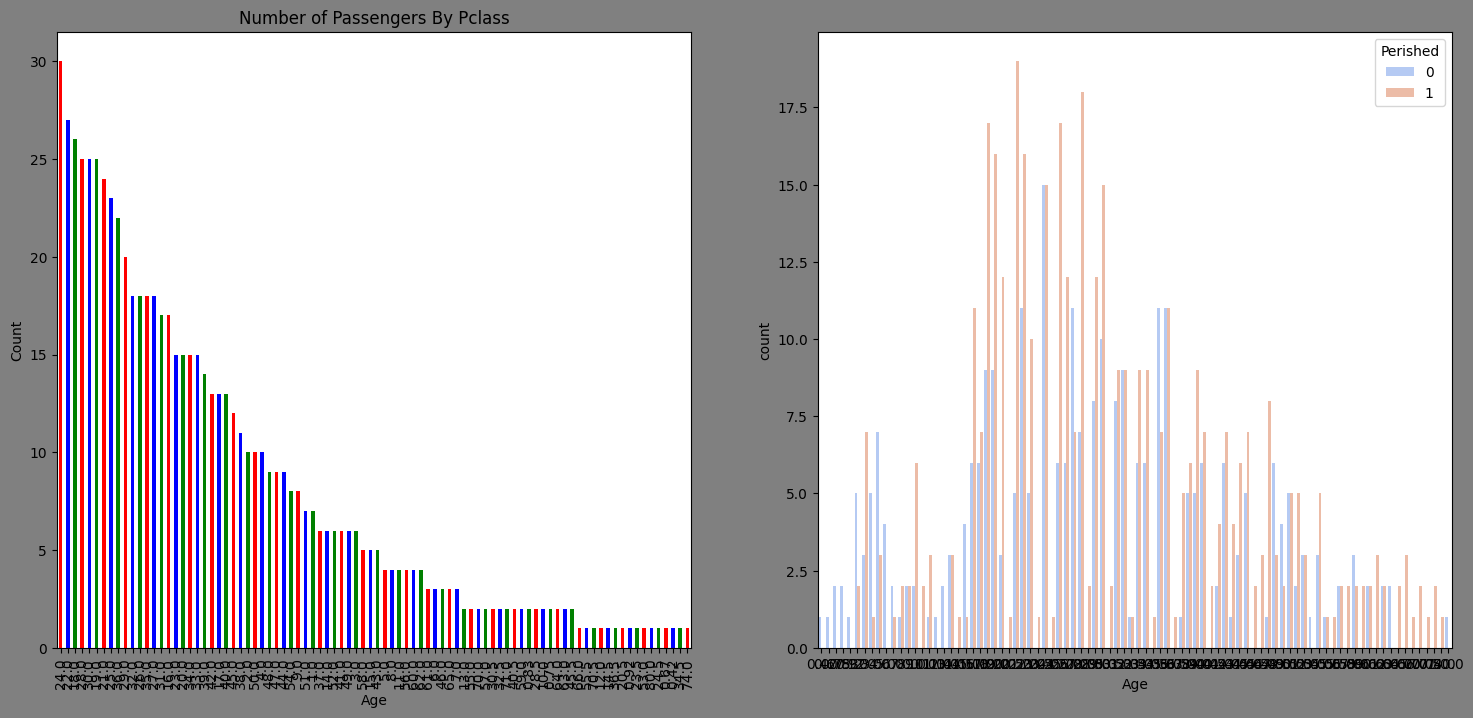

In [15]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Age'].value_counts().plot.bar(color=['red','blue','green'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Age',hue='Perished',data=df,ax=ax[1],palette='coolwarm')
plt.show()

### SibSp

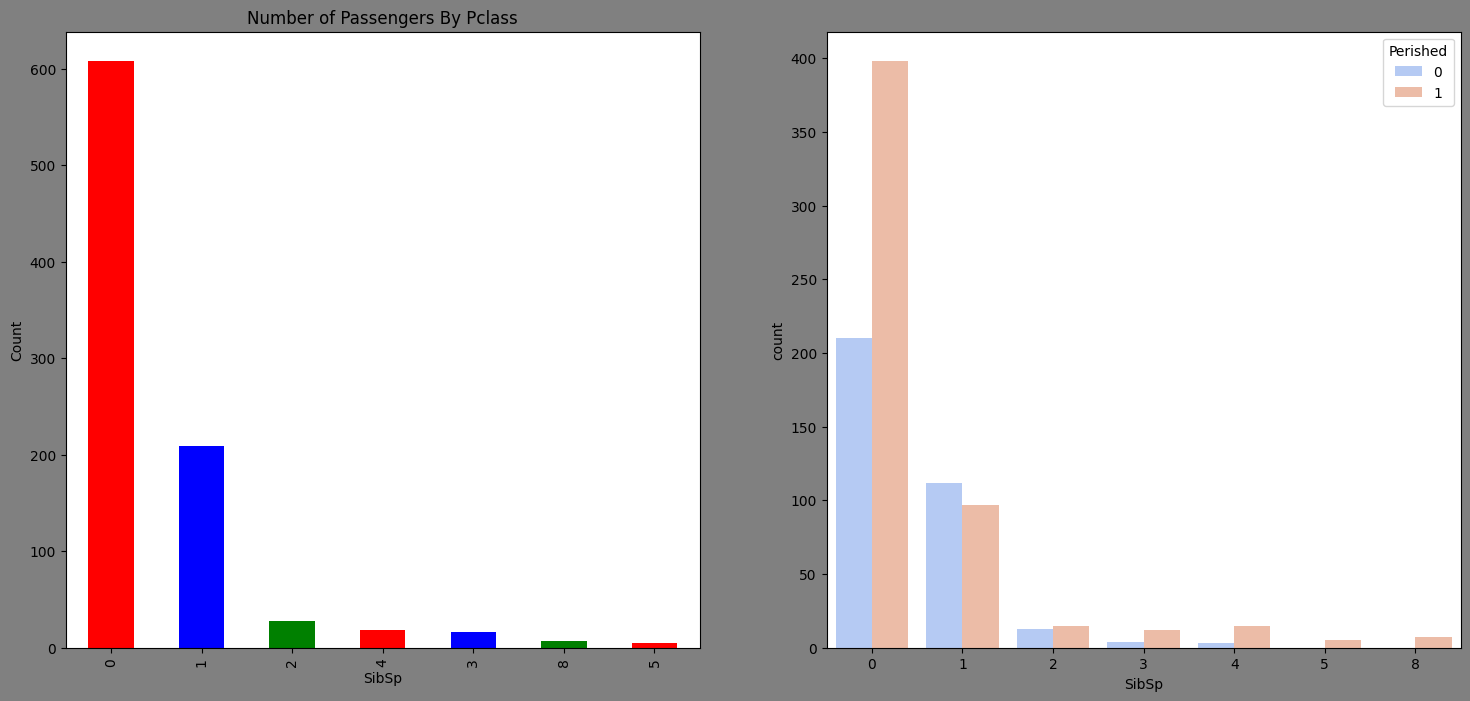

In [16]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['SibSp'].value_counts().plot.bar(color=['red','blue','green'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='SibSp',hue='Perished',data=df,ax=ax[1],palette='coolwarm')
plt.show()

### Parch

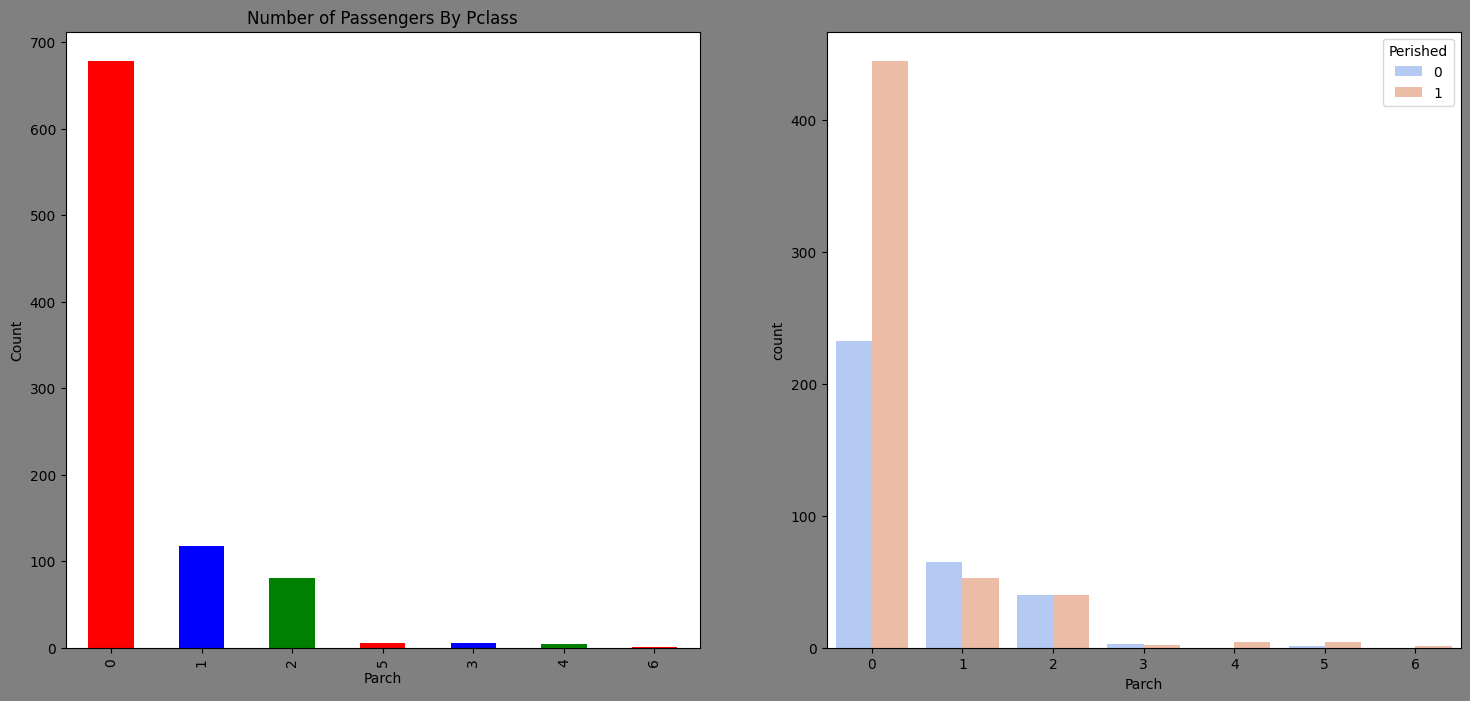

In [17]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Parch'].value_counts().plot.bar(color=['red','blue','green'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Parch',hue='Perished',data=df,ax=ax[1],palette='coolwarm')
plt.show()

### Fare

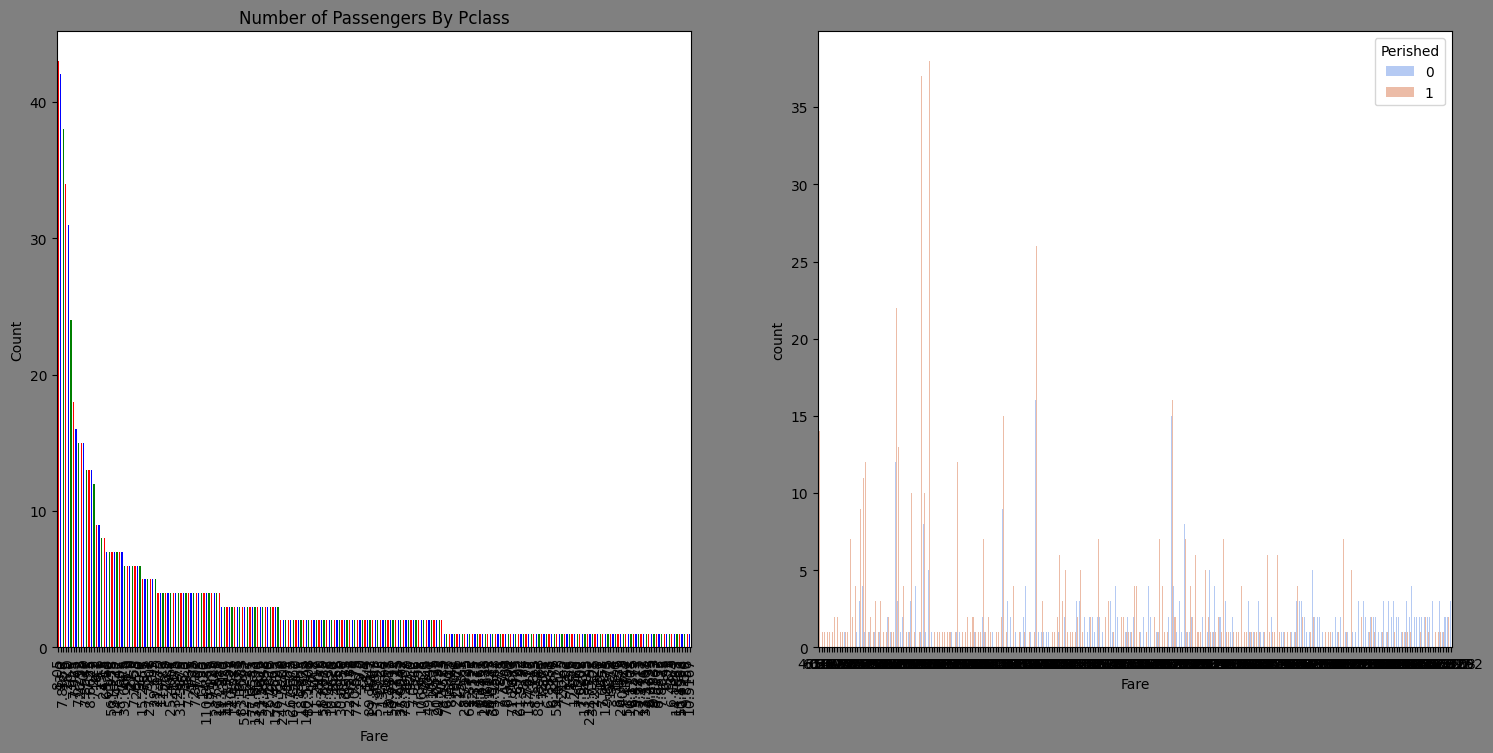

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Fare'].value_counts().plot.bar(color=['red','blue','green'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Fare',hue='Perished',data=df,ax=ax[1],palette='coolwarm')
plt.show()

### Cabin

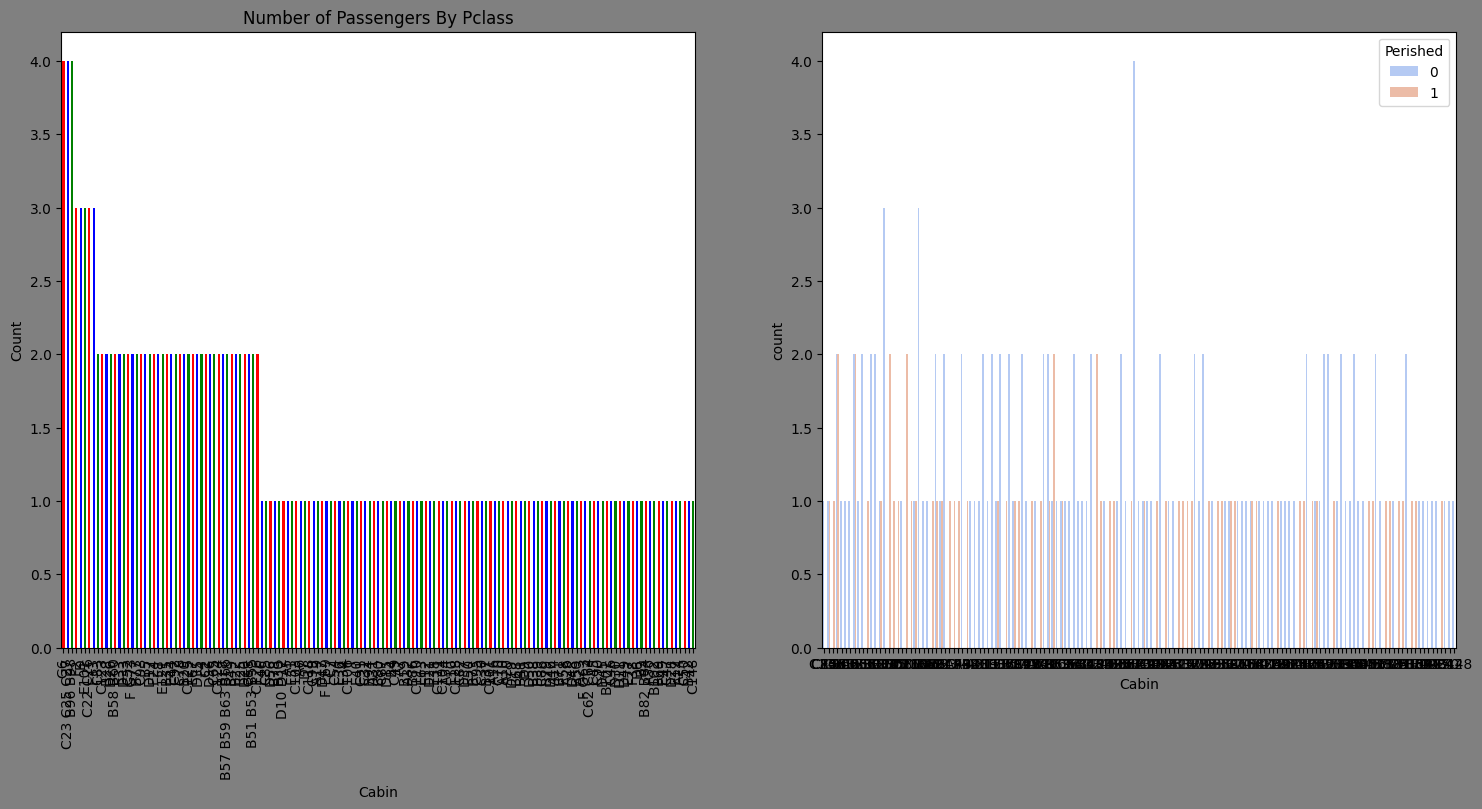

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Cabin'].value_counts().plot.bar(color=['red','blue','green'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Cabin',hue='Perished',data=df,ax=ax[1],palette='coolwarm')
plt.show()

### Embarked

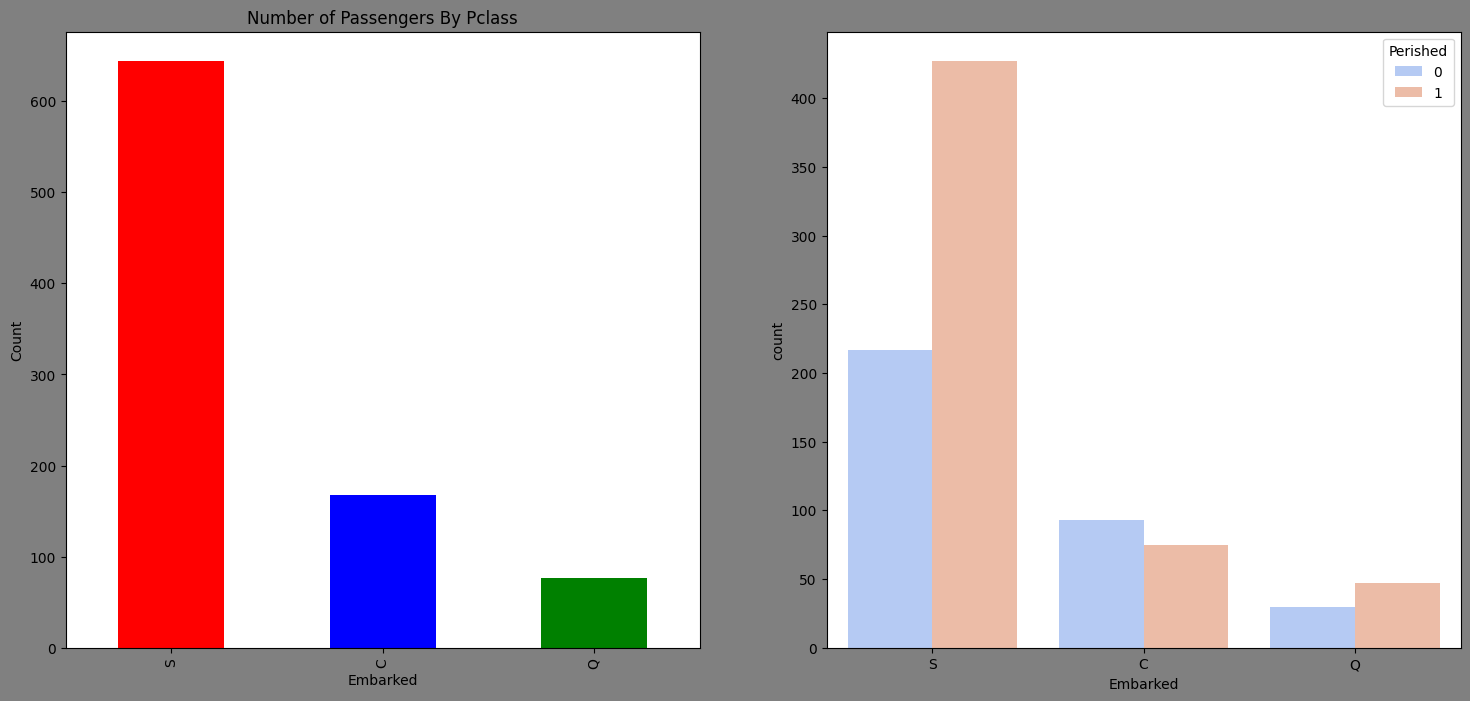

In [21]:
f,ax=plt.subplots(1,2,figsize=(18,8), facecolor='gray')
df['Embarked'].value_counts().plot.bar(color=['red','blue','green'],ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot(x='Embarked',hue='Perished',data=df,ax=ax[1],palette='coolwarm')
plt.show()

## SibSpとParchの分析

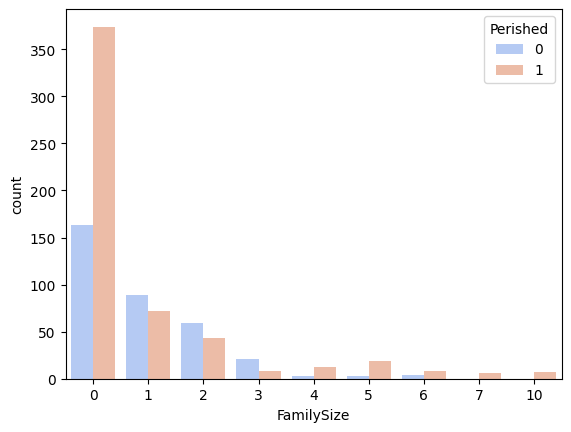

In [23]:
#同乗した兄弟姉妹と親子の人数の和をとり、新たな特徴量「同乗した家族の人数」を作成
df['FamilySize'] = df['SibSp'] + df['Parch']

#FamilySizeと生存率の関係を可視化
sns.countplot(
    x='FamilySize',
    hue='Perished',
    data=df,
    palette='coolwarm'
)

plt.show()

In [39]:
#家族人数毎のデータに含まれる割合
display(df['FamilySize'].value_counts(ascending=False, normalize=True))

#家族人数毎の生存率
display(pd.crosstab(df['FamilySize'], df['Perished'], normalize='index'))

FamilySize
0     0.602694
1     0.180696
2     0.114478
3     0.032548
5     0.024691
4     0.016835
6     0.013468
10    0.007856
7     0.006734
Name: proportion, dtype: float64

Perished,0,1
FamilySize,,
0,0.303538,0.696462
1,0.552795,0.447205
2,0.578431,0.421569
3,0.724138,0.275862
4,0.200000,0.800000
5,0.136364,0.863636
6,0.333333,0.666667
7,0.000000,1.000000
10,0.000000,1.000000


### 家族が1~3では生存率高め

### Alone

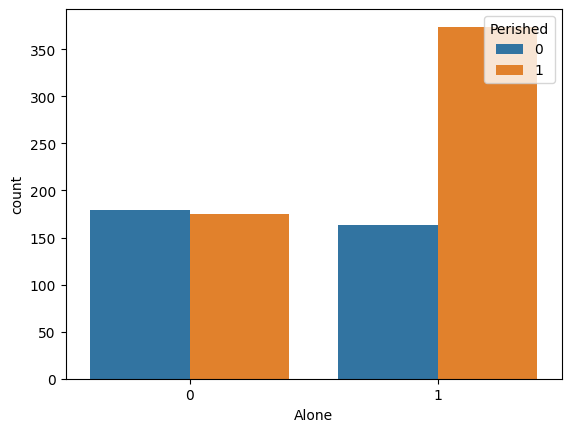

In [42]:
#1人で乗船した人のカテゴリーを作成
#1人で乗船した人を1、2人以上で乗船した人を0
df['Alone'] = df['FamilySize'].map(lambda s: 1 if s == 0 else 0)

#「1人で乗船した人か2人以上で乗船した人か」と生存率の関係を可視化
sns.countplot(
    x='Alone',
    hue='Perished',
    data=df
)
plt.legend(title='Perished', loc='upper right')
plt.show()

In [44]:
#家族人数毎のデータに含まれる割合を算出
display(pd.crosstab(df['Alone'],df['Perished'], normalize='index'))

Perished,0,1
Alone,,
0,0.505650,0.494350
1,0.303538,0.696462


### 一人乗車は生存率低い

## Name

In [46]:
df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [47]:
df['Title'] = df['Name'].map(lambda x: x.split(', ')[1].split('. ')[0])
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

<Axes: xlabel='Title', ylabel='count'>

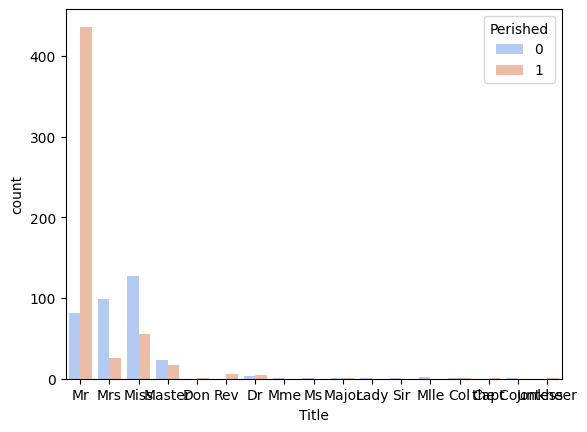

In [51]:
sns.countplot(x=df['Title'], hue=df['Perished'], palette='coolwarm')

## ビニング処理
特徴量分割

<Axes: xlabel='FamilySize-bin', ylabel='count'>

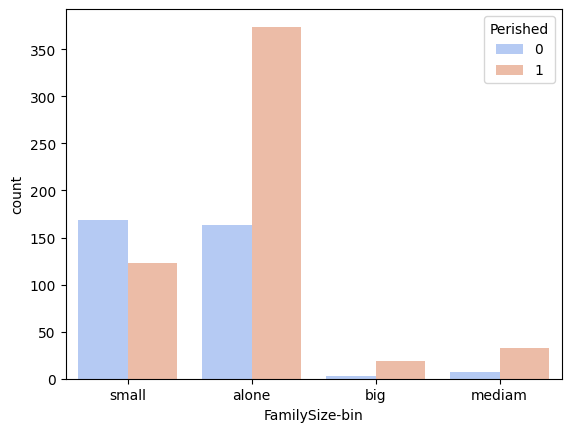

In [54]:

#family-sizeが0の場合”alone”、
# １～3の場合”small”
# 4～6の場合”medium”,
# 7以上を”big”にする→生存率0
 
df['FamilySize-bin'] = 'big'
df.loc[df['FamilySize']==0,'FamilySize-bin'] = 'alone'
df.loc[(df['FamilySize']>=1) & (df['FamilySize']<=3),'FamilySize-bin'] = 'small'
df.loc[(df['FamilySize']>=5) & (df['FamilySize']<=7),'FamilySize-bin'] = 'mediam'
 
#グラフ描画
sns.countplot(x=df['FamilySize-bin'], hue=df['Perished'], palette='coolwarm')

<Axes: xlabel='Title', ylabel='count'>

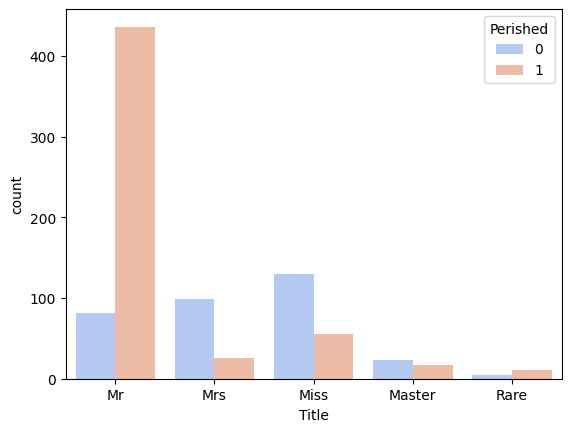

In [ ]:

#省くデータを指定
drop_title = ['Capt','Don','Jonkheer','Lady','Major','Sir','the Countess']
# isin : リストの中に含まれているかどうかを判定
# ~ : 否定
df = df[~df['Title'].isin(drop_title) ].reset_index(drop=True)

df['Title'].replace(['Col','Dr', 'Rev'], 'Rare',inplace=True) #少数派の敬称を統合
df['Title'].replace('Mme', 'Mrs',inplace=True) #Mrsに統合
# Ms,MlleについてもMissの書き間違いと思われるため、Missに統合
df['Title'].replace('Mlle', 'Miss',inplace=True) #Missに統合
df['Title'].replace('Ms', 'Miss',inplace=True) #Missに統合
 
sns.countplot(x=df['Title'], hue=df['Perished'], palette='coolwarm')

https://zenn.dev/kazuyan/articles/20221216_advent_2022